<div align="center">

# 📊 **Global Economic Forecast Hackathon** (with **Texas A&M Aggie Data Science**)

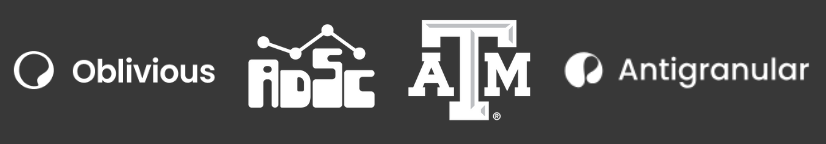

🎉 Welcome to a new [Antigranular](https://antigranular.com) event in collaboration with **Texas A&M Aggie Data Science**! This hackathon focuses on exploring and forecasting global economic trends with cutting-edge tools and methodologies.

🌎 Join us as we dive into economic challenges using Statistical Performance Indicators (SPIs) and let's push the boundaries of privacy preserving data science!

🦜 **Any questions?** Head over to our [Discord](https://discord.com/invite/KJwApgXs4s)!

<a href="https://discord.com/invite/KJwApgXs4s"><img src="https://support.discord.com/hc/user_images/PRywUXcqg0v5DD6s7C3LyQ.jpeg" alt="Discord" width="100px" /></a>



</div>


## 🏃‍♂️ 1. Getting Started

In this section we will download the antigranular package and login




### 📦 Install Antigranular

This command installs the [Antigranular PyPI Package](https://pypi.org/project/antigranular/) on the local enviroment.


In [71]:
# Install the Antigranular package
!pip install antigranular &> /dev/null

### ✍ Login to the Enclave

Head over to the [Competition](https://www.antigranular.com/competitions/global-economic-forecast-hackathon-with-texas-a-m-aggie-data-science) to find your `<user_id>`, `<user_secret>` and the competition's name and copy that command here.

![img](https://docs.antigranular.com/shots/comp_cell.png)

In [ ]:
import antigranular as ag
session = ag.login(<client_id>,<client_secret>, competition = "Global Economic Forecast Hackathon with Texas A&M Aggie Data Science")

Dataset "Statistical Performance Indicators" loaded to the kernel as statistical_performance_indicators
Key Name                       Value Type     
---------------------------------------------
train_x                        PrivateDataFrame
train_y                        PrivateDataFrame
test_x                         DataFrame      

Connected to Antigranular server session id: d22577c8-508b-4711-8115-460df0561f92, the session will time out if idle for 25 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


In [73]:
session.privacy_odometer()

{'total_epsilon_used': 0.0,
 'total_delta_used': 0.0009,
 'library_costs': {'op_tensorflow': {'total_delta': 0.0009,
   'total_epsilon': 0.0,
   'total_requests': 1}},
 'dataset_costs': {'Statistical Performance Indicators': {'delta': 0.0009,
   'eps': 0.0}}}

## 🤖 2. A simple guide of AG

You can now simply use ``%%ag`` to run code on an enclave! You can always head over to our [Docs](https://docs.antigranular.com/) to learn more about AG, but for now, we can define train and test variables as follows.

In [74]:
%%ag
x_train = statistical_performance_indicators["train_x"]
y_train = statistical_performance_indicators["train_y"]
x_test = statistical_performance_indicators["test_x"]

For our `Y` target, we are trying to predict the income level of the sample. Usually, countries are categorized in 4 buckets, but we simplified by focusing in 2 groups (low and lower middle income, versus upper middle and high income)which are separated by 0 and 1.



```
Income levels:
    1. 'Low income': 0,
    2. 'Lower middle income': 0,
    3. 'Upper middle income': 1,
    4. 'High income': 1,
```






---



## 🧠 4. Another more advanced solution

In this section we evaluate an editorial solution in AG using TensorFlow!

In [75]:
%%ag
import tensorflow as tf
from op_pandas import standard_scaler, PrivateDataFrame
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from op_tensorflow import PrivateKerasModel, PrivateDataLoader

# Fast converging Sequential model without explicit regularization
seqM = Sequential([
    # Input block - wide for fast feature capture
    Dense(768, input_shape=(24,),
          kernel_initializer='lecun_normal'),
    BatchNormalization(momentum=0.9),  # Lower momentum for faster adaptation
    tf.keras.layers.ELU(alpha=1.0),    # ELU for faster convergence
    Dropout(0.1),  # Minimal dropout for faster learning

    # Hidden block 1 - aggressive feature refinement
    Dense(384, kernel_initializer='lecun_normal'),
    BatchNormalization(momentum=0.9),
    tf.keras.layers.ELU(alpha=1.0),
    Dropout(0.1),

    # Hidden block 2 - final feature processing
    Dense(192, kernel_initializer='lecun_normal'),
    BatchNormalization(momentum=0.9),
    tf.keras.layers.ELU(alpha=1.0),
    Dropout(0.1),

    # Output layer
    Dense(1, activation='sigmoid',
          kernel_initializer='lecun_normal')
])

# Privacy settings optimized for convergence
dp_model = PrivateKerasModel(
    model=seqM,
    l2_norm_clip=0.5,
    noise_multiplier=1.5
)

# Fast convergence optimizer settings
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,  # Balanced learning rate
    beta_1=0.85,  # Lower beta1 for faster initial steps
    beta_2=0.95,  # Lower beta2 for faster adaptation
    epsilon=1e-5  # Larger epsilon for more aggressive updates
)

# Compile model
dp_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)





/usr/local/lib/python3.10/site-packages/tensorflow/__init__.py:30: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils as _distutils
2024-11-15 21:32:59.413620: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-11-15 21:32:59.492941: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 21:32:59.605432: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-15 21:32:59.605476: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unabl

In [76]:
%%ag
data_loader = PrivateDataLoader(feature_df=x_train , label_df=y_train, batch_size=128)

In [77]:
%%ag
dp_model.fit(x=data_loader, epochs=100, target_delta=0.50)

Epoch 1/100

29/29 - 9s - loss: 0.5015 - accuracy: 0.7696 - 9s/epoch - 296ms/step

Epoch 2/100

29/29 - 3s - loss: 0.4148 - accuracy: 0.8048 - 3s/epoch - 96ms/step

Epoch 3/100

29/29 - 3s - loss: 0.3974 - accuracy: 0.8091 - 3s/epoch - 96ms/step

Epoch 4/100

29/29 - 3s - loss: 0.3886 - accuracy: 0.8170 - 3s/epoch - 96ms/step

Epoch 5/100

29/29 - 3s - loss: 0.3698 - accuracy: 0.8232 - 3s/epoch - 96ms/step

Epoch 6/100

29/29 - 3s - loss: 0.3659 - accuracy: 0.8245 - 3s/epoch - 96ms/step

Epoch 7/100

29/29 - 3s - loss: 0.3557 - accuracy: 0.8341 - 3s/epoch - 90ms/step

Epoch 8/100

29/29 - 3s - loss: 0.3543 - accuracy: 0.8329 - 3s/epoch - 93ms/step

Epoch 9/100

29/29 - 3s - loss: 0.3364 - accuracy: 0.8400 - 3s/epoch - 93ms/step

Epoch 10/100

29/29 - 3s - loss: 0.3762 - accuracy: 0.8177 - 3s/epoch - 90ms/step

Epoch 11/100

29/29 - 3s - loss: 0.3406 - accuracy: 0.8404 - 3s/epoch - 89ms/step

Epoch 12/100

29/29 - 3s - loss: 0.3367 - accuracy: 0.8511 - 3s/epoch - 93ms/step

Epoch 13/100

In [78]:
%%ag
test=PrivateDataFrame(x_test).copy()
y_pred = dp_model.predict(test, label_columns=["output"])

13/13 [==============================] - 1s 9ms/step



In [79]:
%%ag
# Note that the predictions are a float scalar, so we scale it!
def f(x: float) -> float:
    return 1 if x > 0.5 else 0

y_pred["output"] = y_pred["output"].map(f, output_bounds=(0, 1))

In [80]:
%%ag
result = submit_predictions(y_pred)

score: {'leaderboard': 0.990225504156218, 'logs': {'BIN_ACC': 0.990225504156218, 'LIN_EPS': -0.0}}

